In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
from glob import glob 
from pathlib import Path 
import numpy as np 
from fastcore.xtras import load_pickle
from scipy.stats import sem

from gptchem.evaluator import find_learning_curve_intersection, fit_learning_curve, lc
from gptchem.plotsettings import *
from gptchem.settings import (
    ONE_COL_GOLDEN_RATIO_HEIGHT_INCH,
    ONE_COL_WIDTH_INCH,
    TWO_COL_GOLDEN_RATIO_HEIGHT_INCH,
)

from gptchem.representation import smiles_to_canoncial

%matplotlib inline

In [3]:
all_res = glob("results_balanced/*.pkl")

In [4]:
all_cm_res = []
all_confident_res = []

for res in all_res:
    res = load_pickle(res)
    cm_all = res["cm_all"]
    cm_confident = res["cm_confident"]

    cm_all["num_classes"] = res["num_classes"]
    cm_all["num_train_points"] = res["num_train_points"]
    cm_all["representation"] = ", ".join(res["representation"])
    cm_all['num_reps'] = len(res["representation"])

    cm_confident["num_classes"] = res["num_classes"]
    cm_confident["num_train_points"] = res["num_train_points"]
    cm_confident["representation"] = ", ".join(res["representation"])
    cm_confident["frac_confident"] = sum(res["confident"]) / res["num_test_points"]
    cm_confident['num_reps'] = len(res["representation"])

    all_cm_res.append(cm_all)
    all_confident_res.append(cm_confident)

In [5]:
all_cm_res = pd.DataFrame(all_cm_res)
all_confident_res = pd.DataFrame(all_confident_res)

In [6]:
all_cm_res_grouped = (
    all_cm_res[
        [
            "num_classes",
            "representation",
            "num_train_points",
            "accuracy",
            "kappa",
            "f1_macro",
            "f1_micro",
            "num_reps"
        ]
    ]
    .groupby(["num_classes", "representation", "num_train_points"])
    .agg(["mean", "std", sem])
)
all_confident_res_grouped = (
    all_confident_res[
        [
            "num_classes",
            "representation",
            "num_train_points",
            "frac_confident",
            "accuracy",
            "kappa",
            "f1_macro",
            "f1_micro",
                        "num_reps"
        ]
    ]
    .groupby(["num_classes", "representation", "num_train_points"])
    .agg(["mean", "std", sem])
)

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [7]:
all_cm_res_grouped

accuracy  \
                                                                               mean   
num_classes representation                               num_train_points             
2           selfies, canonical                           10                0.515000   
                                                         50                0.560000   
                                                         100               0.630000   
                                                         200               0.625000   
                                                         500               0.800000   
                                                         1000              0.730000   
            selfies, deepsmiles, canonical               10                0.485000   
                                                         50                0.635000   
                                                         100               0.630000   
                                                         200               0.680000   
                                                         500               0.750000   
            selfies, deepsmiles, canonical, inchi, tucan 10                0.510000   
                                                         50                0.630000   
                                                         100               0.680000   
                                                         200               0.690000   
                                                         500               0.770000   
                                                         1000              0.730000   
5           selfies, canonical                           10                0.205000   
                                                         50                0.245000   
                                                         100               0.230000   
                                                         500               0.430000   
                                                         1000              0.470000   
            selfies, deepsmiles, canonical               10                0.203333   
                                                         50                0.295000   
                                                         100               0.300000   
                                                         200               0.290000   
                                                         500               0.410000   
                                                         1000              0.440000   
            selfies, deepsmiles, canonical, inchi, tucan 10                0.175000   
                                                         50                0.290000   
                                                         100               0.295000   
                                                         200               0.340000   
                                                         500               0.440000   
                                                         1000              0.470000   

                                                                                     \
                                                                                std   
num_classes representation                               num_train_points             
2           selfies, canonical                           10                0.035355   
                                                         50                0.042426   
                                                         100                    NaN   
                                                         200               0.021213   
                                                         500                    NaN   
                                                         1000                   NaN   
            selfies, deepsmiles, canonical               10             

In [8]:
all_confident_res_grouped

frac_confident  \
                                                                                    mean   
num_classes representation                               num_train_points                  
2           selfies, canonical                           10                     0.605000   
                                                         50                     0.510000   
                                                         100                    0.640000   
                                                         200                    0.590000   
                                                         500                    0.740000   
                                                         1000                   0.780000   
            selfies, deepsmiles, canonical               10                     0.305000   
                                                         50                     0.410000   
                                                         100                    0.520000   
                                                         200                    0.525000   
                                                         500                    0.740000   
            selfies, deepsmiles, canonical, inchi, tucan 10                     0.125000   
                                                         50                     0.185000   
                                                         100                    0.280000   
                                                         200                    0.320000   
                                                         500                    0.360000   
                                                         1000                   0.390000   
5           selfies, canonical                           10                     0.195000   
                                                         50                     0.245000   
                                                         100                    0.220000   
                                                         500                    0.430000   
                                                         1000                   0.550000   
            selfies, deepsmiles, canonical               10                     0.046667   
                                                         50                     0.155000   
                                                         100                    0.160000   
                                                         200                    0.200000   
                                                         500                    0.260000   
                                                         1000                   0.315000   
            selfies, deepsmiles, canonical, inchi, tucan 10                     0.010000   
                                                         50                     0.010000   
                                                         100                    0.020000   
                                                         200                    0.060000   
                                                         500                    0.150000   
                                                         1000                   0.065000   

                                                                                     \
                                                                                std   
num_classes representation                               num_train_points             
2           selfies, canonical                           10                0.049497   
                                                         50                0.028284   
                                                         100                    NaN   
                                                         200               0.028284   
                                                         500

In [9]:
qmug_res = pd.read_pickle('../../../03_classification/bandgap/grouped_res.pkl')
qmug_res_no_aug = pd.read_pickle('../../01_smiles_randomization/qmug/no_aug_results.pkl')

In [10]:
qmug_res_no_aug

accuracy                     acc_macro            \
                                 mean       std       sem      mean       std   
num_classes real_train_size                                                     
2           10               0.510000  0.019799  0.014000  0.510000  0.019799   
            50               0.621333  0.023438  0.013532  0.621333  0.023438   
            100              0.628000       NaN       NaN  0.628000       NaN   
            200              0.678000  0.008485  0.006000  0.678000  0.008485   
            500              0.648000       NaN       NaN  0.648000       NaN   
            1000             0.752000       NaN       NaN  0.752000       NaN   
            5000             0.852000       NaN       NaN  0.852000       NaN   
            10000            0.854000  0.025456  0.018000  0.854000  0.025456   
5           200              0.888000       NaN       NaN  0.925333       NaN   
            1000             0.914000  0.008485  0.006000  0.942667  0.005657   

                                           racc                         kappa  \
                                  sem      mean       std       sem      mean   
num_classes real_train_size                                                     
2           10               0.014000  0.500672  0.012898  0.009120  0.018866   
            50               0.013532  0.500768  0.003597  0.002077  0.241450   
            100                   NaN  0.507488       NaN       NaN  0.244688   
            200              0.006000  0.502016  0.002851  0.002016  0.353431   
            500                   NaN  0.502304       NaN       NaN  0.292741   
            1000                  NaN  0.498848       NaN       NaN  0.505140   
            5000                  NaN  0.499424       NaN       NaN  0.704341   
            10000            0.018000  0.501632  0.000407  0.000288  0.707065   
5           200                   NaN  0.846912       NaN       NaN  0.268395   
            1000             0.004000  0.825664  0.011359  0.008032  0.507239   

                             ... deduplicate include_canonical            \
                             ...         sem              mean  std  sem   
num_classes real_train_size  ...                                           
2           10               ...    0.000000               1.0  0.0  0.0   
            50               ...    0.333333               1.0  0.0  0.0   
            100              ...         NaN               1.0  NaN  NaN   
            200              ...    0.000000               1.0  0.0  0.0   
            500              ...         NaN               1.0  NaN  NaN   
            1000             ...         NaN               1.0  NaN  NaN   
            5000             ...         NaN               1.0  NaN  NaN   
            10000            ...    0.500000               1.0  0.0  0.0   
5           200              ...         NaN               1.0  NaN  NaN   
            1000             ...    0.500000               1.0  0.0  0.0   

                            train_size_aug           real_train_size_can       \
                                      mean  std  sem                mean  std   
num_classes real_train_size                                                     
2           10                        10.0  NaN  NaN                10.0  0.0   
            50                        50.0  NaN  NaN                50.0  0.0   
            100                      100.0  NaN  NaN               100.0  NaN   
            200                      200.0  0.0  0.0               200.0  0.0   
            500                      500.0  NaN  NaN               500.0  NaN   
            1000                    1000.0  NaN  NaN              1000.0  NaN   
            5000                    5000.0  NaN  NaN              5000.0  NaN   
            10000                  10000.0  0.0  0.0             10000.0  0.0   
5           200                      200.

In [11]:
qmug_res_no_aug['representation'] = 'SMILES'

# add the 'representation' column to the multiindex 
qmug_res_no_aug.set_index('representation', append=True, inplace=True)

# then swap the order of the multiindex so that 'representation' is the second level
qmug_res_no_aug = qmug_res_no_aug.swaplevel(1, 2, axis=0)

KeyError: 'f1_macro'

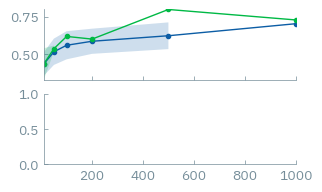

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(ONE_COL_WIDTH_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex=True)

metric = 'f1_macro'

ax[0].plot(qmug_res.loc[2, 'SMILES'].index, qmug_res.loc[2, 'SMILES'][metric]['mean'], label='SMILES', marker='o')
ax[0].fill_between(qmug_res.loc[2, 'SMILES'].index, 
                   qmug_res.loc[2, 'SMILES'][metric]['mean'] - qmug_res.loc[2, 'SMILES'][metric]['sem'], qmug_res.loc[2, 'SMILES'][metric]['mean'] + qmug_res.loc[2, 'SMILES'][metric]['sem'], alpha=0.2)
for reps in all_cm_res['representation'].unique(): 
    subset = all_cm_res_grouped.loc[2, reps]
    subset_confident = all_confident_res_grouped.loc[2, reps]
   
    ax[0].plot(subset.index, subset[metric]['mean'], label=reps, marker='o')
    ax[0].fill_between(subset.index, subset[metric]['mean'] - subset[metric]['sem'], subset[metric]['mean'] + subset[metric]['sem'], alpha=0.2)

    ax[0].plot(subset_confident.index, subset_confident[metric]['mean'], label=reps + " (confident)", marker='o')
    ax[0].fill_between(subset_confident.index, subset_confident[metric]['mean'] - subset_confident[metric]['sem'], subset_confident[metric]['mean'] + subset_confident[metric]['sem'], alpha=0.2)

ax[0].set_xscale('log')

matplotx.line_labels(ax[0])

ylabel_top(r'F$_1$ macro binary', ax[0])
ylabel_top(r'F$_1$ macro 5-class', ax[1])

plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)

ax[-1].set_xlabel('number of training points')

fig.savefig('multirep_qmugs_lc.pdf', bbox_inches='tight')